In [1]:
from qiskit import IBMQ, Aer, assemble, transpile, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import array_to_latex
from qiskit.tools.monitor import job_monitor 
from qiskit.providers.ibmq import least_busy

import datetime
from datetime import time
from datetime import datetime
import pytz
from pytz import timezone

import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
matrixdata = {}

#time loop 
def collectdata(matrixdata, listofhours, listofminutes):
    t = datetime.now(pytz.timezone('US/Central'))
    print(t)  
    for val in listofhours:
        for val2 in listofminutes:
            while True:
                if t.hour== val and t.minute == val2: 
                    bigmatrix= []
                    #copied from the qiskit document in slack 
                    for state in ['000','001','010','011','100','101','110','111']:
                        qc = QuantumCircuit(3,3)
                        if state[0]=='1':
                            qc.x(2)
                        if state[1]=='1':
                            qc.x(1)
                        if state[2]=='1':
                            qc.x(0)
                        qc.measure([0, 1, 2],[0,1,2])

                        #copied from summer school code
                        IBMQ.load_account()
                        provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
                        backend = provider.get_backend('ibm_perth')
                        print("backend: ", backend)

                        shots = 5000
                        transpiled_qc = transpile(qc, backend=backend)
                        job = backend.run(transpiled_qc, shots=shots)
                        job_monitor(job, interval=2)
                        results = job.result().get_counts()
                        print ("results:", results)

                        # in this next part I'm just trying to say that if there's less than 4 items (implying that one of the states showed up zero times), add a zero at the corresponding spot in the list
                        # i'm sure there's a more efficient way to do this 
                        keys= results.keys()
                        values = results.values()
                        numoftimes= []
                        state= []
                        for value in values:
                            numoftimes.append(value/5000)
                        for key in keys:
                            state.append(key)

                        while len(state) < 8:
                            state.append(0)

                        if state != ['000','001','010','011','100','101','110','111']:
                            if state[0] != '000':
                                state.insert(0,'000')
                                numoftimes.insert(0,0)
                            if state[1] != '001':
                                state.insert(1,'001')
                                numoftimes.insert(1,0)
                            if state[2] != '010':
                                state.insert(2,'010')
                                numoftimes.insert(2,0)
                            if state[3] != '011':
                                state.insert(3,'011')
                                numoftimes.insert(3,0)
                            if state[4] != '100':
                                state.insert(4,'100')
                                numoftimes.insert(4,0)
                            if state[5] != '101':
                                state.insert(5,'101')
                                numoftimes.insert(5,0)
                            if state[6] != '110':
                                state.insert(6,'110')
                                numoftimes.insert(6,0)
                            if state[7] != '111':
                                state.insert(7,'111')
                                numoftimes.insert(7,0)

                        #print(numoftimes)
                        bigmatrix.append(numoftimes)

                    #print("big matrix:", bigmatrix)
                    matrixdata[str(datetime.now(pytz.timezone('US/Central')))]= bigmatrix
                    break
                else:
                    t = datetime.now(pytz.timezone('US/Central'))
    return matrixdata


In [3]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]]}

In [28]:
collectdata(matrixdata,11,[53])

2021-11-18 11:52:34.456558-06:00


ibmqfactory.load_account:WARNING:2021-11-18 17:53:00,215: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibmq_casablanca
Job Status: job has successfully run
results: {'000': 4898, '001': 48, '010': 27, '011': 5, '100': 22}
[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0]


ibmqfactory.load_account:WARNING:2021-11-18 18:31:48,186: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:32:19,262: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 228, '001': 4739, '011': 17, '100': 1, '101': 15}
[0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:32:53,733: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 162, '001': 2, '010': 4781, '011': 32, '110': 22, '111': 1}
[0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:33:47,417: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 14, '001': 130, '010': 232, '011': 4602, '111': 22}
[0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:34:37,164: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 67, '010': 1, '100': 4862, '101': 39, '110': 31}
[0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:35:07,879: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 2, '001': 63, '100': 243, '101': 4674, '110': 2, '111': 16}
[0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032]
backend:  ibmq_casablanca
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-11-18 18:36:48,457: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 8, '010': 77, '011': 1, '100': 571, '101': 3, '110': 4312, '111': 28}
[0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056]
backend:  ibmq_casablanca
Job Status: job has successfully run
results: {'001': 1, '010': 4, '011': 61, '100': 10, '101': 139, '110': 284, '111': 4501}
[0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]
big matrix: [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]]


{'2021-11-13 17:09:10.667507-06:00': [[0.9786,
   0.0056,
   0.012,
   0.0004,
   0.0034,
   0,
   0,
   0],
  [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002],
  [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0],
  [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058],
  [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004],
  [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074],
  [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074],
  [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]],
 '2021-11-13 17:29:26.314269-06:00': [[0.9678,
   0.0188,
   0.0074,
   0.0018,
   0.0042,
   0,
   0,
   0],
  [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002],
  [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0],
  [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014],
  [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004],
  [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114],
  [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009],
  [0, 0.00

In [4]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]], '2021-11-18 12:37:18.182071-06:00': [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]]}

In [14]:
collectdata(matrixdata, [16,17], [5, 36])

2021-12-03 16:04:31.844296-06:00


ibmqfactory.load_account:WARNING:2021-12-03 22:05:00,225: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:05:41,282: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4754, '001': 59, '010': 84, '011': 5, '100': 94, '101': 1, '110': 3}
[0.9508, 0.0118, 0.0168, 0.001, 0.0188, 0.0002, 0.0006, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:06:00,712: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 208, '001': 4603, '010': 6, '011': 88, '100': 3, '101': 90, '111': 2}
[0.0416, 0.9206, 0.0012, 0.0176, 0.0006, 0.018, 0, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:06:39,647: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 108, '001': 1, '010': 4735, '011': 59, '100': 3, '110': 93, '111': 1}
[0.0216, 0.0002, 0.947, 0.0118, 0.0006, 0, 0.0186, 0.0002]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:07:07,957: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 5, '001': 111, '010': 238, '011': 4546, '101': 3, '110': 9, '111': 88}
[0.001, 0.0222, 0.0476, 0.9092, 0, 0.0006, 0.0018, 0.0176]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:07:30,595: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 70, '001': 1, '010': 1, '100': 4768, '101': 63, '110': 95, '111': 2}
[0.014, 0.0002, 0.0002, 0, 0.9536, 0.0126, 0.019, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:07:51,096: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4, '001': 74, '011': 1, '100': 230, '101': 4621, '110': 1, '111': 69}
[0.0008, 0.0148, 0, 0.0002, 0.046, 0.9242, 0.0002, 0.0138]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:08:21,965: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 3, '010': 71, '011': 3, '100': 131, '101': 1, '110': 4728, '111': 63}
[0.0006, 0, 0.0142, 0.0006, 0.0262, 0.0002, 0.9456, 0.0126]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 2, '010': 3, '011': 63, '100': 4, '101': 126, '110': 208, '111': 4594}
[0, 0.0004, 0.0006, 0.0126, 0.0008, 0.0252, 0.0416, 0.9188]
big matrix: [[0.9508, 0.0118, 0.0168, 0.001, 0.0188, 0.0002, 0.0006, 0], [0.0416, 0.9206, 0.0012, 0.0176, 0.0006, 0.018, 0, 0.0004], [0.0216, 0.0002, 0.947, 0.0118, 0.0006, 0, 0.0186, 0.0002], [0.001, 0.0222, 0.0476, 0.9092, 0, 0.0006, 0.0018, 0.0176], [0.014, 0.0002, 0.0002, 0, 0.9536, 0.0126, 0.019, 0.0004], [0.0008, 0.0148, 0, 0.0002, 0.046, 0.9242, 0.0002, 0.0138], [0.0006, 0, 0.0142, 0.0006, 0.0262, 0.0002, 0.9456, 0.0126], [0, 0.0004, 0.0006, 0.0126, 0.0008, 0.0252, 0.0416, 0.9188]]


ibmqfactory.load_account:WARNING:2021-12-03 22:36:00,211: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:36:27,203: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4755, '001': 64, '010': 79, '100': 100, '101': 1, '110': 1}
[0.951, 0.0128, 0.0158, 0, 0.02, 0.0002, 0.0002, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:37:07,668: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 194, '001': 4598, '010': 7, '011': 99, '100': 6, '101': 95, '111': 1}
[0.0388, 0.9196, 0.0014, 0.0198, 0.0012, 0.019, 0, 0.0002]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:38:37,410: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 107, '001': 1, '010': 4742, '011': 59, '100': 2, '110': 87, '111': 2}
[0.0214, 0.0002, 0.9484, 0.0118, 0.0004, 0, 0.0174, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:39:00,064: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4, '001': 124, '010': 198, '011': 4595, '100': 1, '101': 1, '110': 4, '111': 73}
[0.0008, 0.0248, 0.0396, 0.919, 0.0002, 0.0002, 0.0008, 0.0146]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:39:37,772: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 72, '001': 1, '010': 4, '100': 4782, '101': 55, '110': 86}
[0.0144, 0.0002, 0.0008, 0, 0.9564, 0.011, 0.0172, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:40:17,805: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '001': 77, '011': 1, '100': 207, '101': 4616, '110': 1, '111': 97}
[0.0002, 0.0154, 0, 0.0002, 0.0414, 0.9232, 0.0002, 0.0194]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 22:41:21,104: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '010': 65, '011': 2, '100': 100, '101': 2, '110': 4777, '111': 53}
[0.0002, 0, 0.013, 0.0004, 0.02, 0.0004, 0.9554, 0.0106]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 2, '010': 1, '011': 70, '100': 6, '101': 87, '110': 198, '111': 4636}
[0, 0.0004, 0.0002, 0.014, 0.0012, 0.0174, 0.0396, 0.9272]
big matrix: [[0.951, 0.0128, 0.0158, 0, 0.02, 0.0002, 0.0002, 0], [0.0388, 0.9196, 0.0014, 0.0198, 0.0012, 0.019, 0, 0.0002], [0.0214, 0.0002, 0.9484, 0.0118, 0.0004, 0, 0.0174, 0.0004], [0.0008, 0.0248, 0.0396, 0.919, 0.0002, 0.0002, 0.0008, 0.0146], [0.0144, 0.0002, 0.0008, 0, 0.9564, 0.011, 0.0172, 0], [0.0002, 0.0154, 0, 0.0002, 0.0414, 0.9232, 0.0002, 0.0194], [0.0002, 0, 0.013, 0.0004, 0.02, 0.0004, 0.9554, 0.0106], [0, 0.0004, 0.0002, 0.014, 0.0012, 0.0174, 0.0396, 0.9272]]


ibmqfactory.load_account:WARNING:2021-12-03 23:05:00,218: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:05:42,454: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4764, '001': 50, '010': 82, '011': 2, '100': 101, '110': 1}
[0.9528, 0.01, 0.0164, 0.0004, 0.0202, 0, 0.0002, 0]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 206, '001': 4583, '010': 4, '011': 91, '100': 7, '101': 105, '111': 4}
[0.0412, 0.9166, 0.0008, 0.0182, 0.0014, 0.021, 0, 0.0008]


ibmqfactory.load_account:WARNING:2021-12-03 23:06:31,998: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:07:22,975: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 97, '001': 3, '010': 4744, '011': 51, '100': 2, '110': 101, '111': 2}
[0.0194, 0.0006, 0.9488, 0.0102, 0.0004, 0, 0.0202, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:08:12,650: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 5, '001': 89, '010': 208, '011': 4614, '101': 4, '110': 1, '111': 79}
[0.001, 0.0178, 0.0416, 0.9228, 0, 0.0008, 0.0002, 0.0158]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:09:23,559: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 94, '001': 1, '010': 2, '100': 4768, '101': 54, '110': 79, '111': 2}
[0.0188, 0.0002, 0.0004, 0, 0.9536, 0.0108, 0.0158, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:10:22,639: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 3, '001': 66, '011': 2, '100': 197, '101': 4641, '110': 1, '111': 90}
[0.0006, 0.0132, 0, 0.0004, 0.0394, 0.9282, 0.0002, 0.018]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:11:02,412: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 2, '010': 83, '011': 1, '100': 161, '101': 1, '110': 4704, '111': 48}
[0.0004, 0, 0.0166, 0.0002, 0.0322, 0.0002, 0.9408, 0.0096]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 2, '010': 4, '011': 85, '100': 6, '101': 130, '110': 225, '111': 4548}
[0, 0.0004, 0.0008, 0.017, 0.0012, 0.026, 0.045, 0.9096]
big matrix: [[0.9528, 0.01, 0.0164, 0.0004, 0.0202, 0, 0.0002, 0], [0.0412, 0.9166, 0.0008, 0.0182, 0.0014, 0.021, 0, 0.0008], [0.0194, 0.0006, 0.9488, 0.0102, 0.0004, 0, 0.0202, 0.0004], [0.001, 0.0178, 0.0416, 0.9228, 0, 0.0008, 0.0002, 0.0158], [0.0188, 0.0002, 0.0004, 0, 0.9536, 0.0108, 0.0158, 0.0004], [0.0006, 0.0132, 0, 0.0004, 0.0394, 0.9282, 0.0002, 0.018], [0.0004, 0, 0.0166, 0.0002, 0.0322, 0.0002, 0.9408, 0.0096], [0, 0.0004, 0.0008, 0.017, 0.0012, 0.026, 0.045, 0.9096]]


ibmqfactory.load_account:WARNING:2021-12-03 23:36:00,239: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:36:21,661: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4751, '001': 56, '010': 75, '011': 2, '100': 113, '110': 3}
[0.9502, 0.0112, 0.015, 0.0004, 0.0226, 0, 0.0006, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:38:42,007: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 202, '001': 4601, '010': 2, '011': 90, '100': 3, '101': 102}
[0.0404, 0.9202, 0.0004, 0.018, 0.0006, 0.0204, 0, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:39:12,917: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 126, '001': 1, '010': 4697, '011': 70, '100': 4, '110': 100, '111': 2}
[0.0252, 0.0002, 0.9394, 0.014, 0.0008, 0, 0.02, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:39:53,319: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 5, '001': 147, '010': 187, '011': 4564, '101': 3, '110': 7, '111': 87}
[0.001, 0.0294, 0.0374, 0.9128, 0, 0.0006, 0.0014, 0.0174]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:40:23,832: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 75, '001': 1, '100': 4769, '101': 66, '110': 88, '111': 1}
[0.015, 0.0002, 0, 0, 0.9538, 0.0132, 0.0176, 0.0002]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:41:04,335: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 5, '001': 70, '011': 2, '100': 226, '101': 4614, '110': 1, '111': 82}
[0.001, 0.014, 0, 0.0004, 0.0452, 0.9228, 0.0002, 0.0164]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2021-12-03 23:41:42,621: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '010': 71, '011': 1, '100': 207, '101': 1, '110': 4677, '111': 42}
[0.0002, 0, 0.0142, 0.0002, 0.0414, 0.0002, 0.9354, 0.0084]
backend:  ibm_perth
Job Status: job has successfully run
results: {'010': 3, '011': 89, '100': 11, '101': 200, '110': 221, '111': 4476}
[0, 0, 0.0006, 0.0178, 0.0022, 0.04, 0.0442, 0.8952]
big matrix: [[0.9502, 0.0112, 0.015, 0.0004, 0.0226, 0, 0.0006, 0], [0.0404, 0.9202, 0.0004, 0.018, 0.0006, 0.0204, 0, 0], [0.0252, 0.0002, 0.9394, 0.014, 0.0008, 0, 0.02, 0.0004], [0.001, 0.0294, 0.0374, 0.9128, 0, 0.0006, 0.0014, 0.0174], [0.015, 0.0002, 0, 0, 0.9538, 0.0132, 0.0176, 0.0002], [0.001, 0.014, 0, 0.0004, 0.0452, 0.9228, 0.0002, 0.0164], [0.0002, 0, 0.0142, 0.0002, 0.0414, 0.0002, 0.9354, 0.0084], [0, 0, 0.0006, 0.0178, 0.0022, 0.04, 0.0442, 0.8952]]


{'2021-11-13 17:09:10.667507-06:00': [[0.9786,
   0.0056,
   0.012,
   0.0004,
   0.0034,
   0,
   0,
   0],
  [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002],
  [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0],
  [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058],
  [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004],
  [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074],
  [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074],
  [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]],
 '2021-11-13 17:29:26.314269-06:00': [[0.9678,
   0.0188,
   0.0074,
   0.0018,
   0.0042,
   0,
   0,
   0],
  [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002],
  [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0],
  [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014],
  [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004],
  [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114],
  [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009],
  [0, 0.00

In [5]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]], '2021-11-18 12:37:18.182071-06:00': [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]], '2021-12-03 16:08:50.882875-06:00': [[0.9508, 0.0118, 0.0168, 0.001, 0.0188, 0.0002, 0.0006, 0], [0.0416, 0.9206, 0.0012, 0.0176, 0.0006, 0.018, 0, 0.0004], [0.0216, 0.0002, 0.947, 0.0118, 0.0006, 0, 0.0186, 0.0002], [0.001, 0.0222, 0.0476, 0.9092, 0, 0.0006, 0.0018, 0.0176], [0.014, 0.0002, 0.0002, 0, 0.9536, 0.0126, 0.019, 0.0004], [0.0008, 0.0148, 0, 0.0002, 0.046, 0.9242, 0.0002, 0.0138], [0.0006, 0, 0.0142, 0.0006, 0.0262, 0.0002, 0.9456, 0.0126], [0, 0.0004, 0.0006, 0.0126, 0.0008, 0.0252, 0.0416, 0.9188]], '2021-12-03 16:41:58.795360-06:00': [[0.951, 0.0128, 0.0158, 0, 0.02, 0.0002, 0.0002, 0], [0.0388, 0.9196, 0.0014, 0.0198, 0.0012, 0.019, 0, 0.0002], [0.0214, 0.0002, 0.9484, 0.0118, 0.0004, 0, 0.0174, 0.0004], [0.0008, 0.0248, 0.0396, 0.919, 0.0002, 0.0002, 0.0008, 0.0146], [0.0144, 0.0002, 0.0008, 0, 0.9564, 0.011, 0.0172, 0], [0.0002, 0.0154, 0, 0.0002, 0.0414, 0.9232, 0.0002, 0.0194], [0.0002, 0, 0.013, 0.0004, 0.02, 0.0004, 0.9554, 0.0106], [0, 0.0004, 0.0002, 0.014, 0.0012, 0.0174, 0.0396, 0.9272]], '2021-12-03 17:11:31.260340-06:00': [[0.9528, 0.01, 0.0164, 0.0004, 0.0202, 0, 0.0002, 0], [0.0412, 0.9166, 0.0008, 0.0182, 0.0014, 0.021, 0, 0.0008], [0.0194, 0.0006, 0.9488, 0.0102, 0.0004, 0, 0.0202, 0.0004], [0.001, 0.0178, 0.0416, 0.9228, 0, 0.0008, 0.0002, 0.0158], [0.0188, 0.0002, 0.0004, 0, 0.9536, 0.0108, 0.0158, 0.0004], [0.0006, 0.0132, 0, 0.0004, 0.0394, 0.9282, 0.0002, 0.018], [0.0004, 0, 0.0166, 0.0002, 0.0322, 0.0002, 0.9408, 0.0096], [0, 0.0004, 0.0008, 0.017, 0.0012, 0.026, 0.045, 0.9096]], '2021-12-03 17:42:32.608782-06:00': [[0.9502, 0.0112, 0.015, 0.0004, 0.0226, 0, 0.0006, 0], [0.0404, 0.9202, 0.0004, 0.018, 0.0006, 0.0204, 0, 0], [0.0252, 0.0002, 0.9394, 0.014, 0.0008, 0, 0.02, 0.0004], [0.001, 0.0294, 0.0374, 0.9128, 0, 0.0006, 0.0014, 0.0174], [0.015, 0.0002, 0, 0, 0.9538, 0.0132, 0.0176, 0.0002], [0.001, 0.014, 0, 0.0004, 0.0452, 0.9228, 0.0002, 0.0164], [0.0002, 0, 0.0142, 0.0002, 0.0414, 0.0002, 0.9354, 0.0084], [0, 0, 0.0006, 0.0178, 0.0022, 0.04, 0.0442, 0.8952]]}

In [23]:
collectdata(matrixdata, [21,22], [2, 33])

2022-01-08 21:01:19.338377-06:00
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:04:11,392: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4776, '001': 58, '010': 64, '011': 1, '100': 98, '101': 1, '110': 2}
[0.9552, 0.0116, 0.0128, 0.0002, 0.0196, 0.0002, 0.0004, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:06:11,438: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 217, '001': 4608, '010': 6, '011': 68, '100': 4, '101': 96, '111': 1}
[0.0434, 0.9216, 0.0012, 0.0136, 0.0008, 0.0192, 0, 0.0002]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:08:10,979: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 111, '001': 2, '010': 4689, '011': 67, '100': 4, '110': 126, '111': 1}
[0.0222, 0.0004, 0.9378, 0.0134, 0.0008, 0, 0.0252, 0.0002]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:10:30,850: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 5, '001': 104, '010': 202, '011': 4584, '101': 2, '110': 4, '111': 99}
[0.001, 0.0208, 0.0404, 0.9168, 0, 0.0004, 0.0008, 0.0198]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 80, '001': 1, '010': 1, '100': 4735, '101': 84, '110': 96, '111': 3}
[0.016, 0.0002, 0.0002, 0, 0.947, 0.0168, 0.0192, 0.0006]


ibmqfactory.load_account:WARNING:2022-01-09 03:11:01,744: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:13:02,288: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '001': 81, '011': 1, '100': 195, '101': 4631, '110': 3, '111': 88}
[0.0002, 0.0162, 0, 0.0002, 0.039, 0.9262, 0.0006, 0.0176]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:15:12,127: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '010': 73, '011': 2, '100': 104, '110': 4742, '111': 78}
[0.0002, 0, 0.0146, 0.0004, 0.0208, 0, 0.9484, 0.0156]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 1, '010': 3, '011': 78, '100': 7, '101': 97, '110': 208, '111': 4606}
[0, 0.0002, 0.0006, 0.0156, 0.0014, 0.0194, 0.0416, 0.9212]
big matrix: [[0.9552, 0.0116, 0.0128, 0.0002, 0.0196, 0.0002, 0.0004, 0], [0.0434, 0.9216, 0.0012, 0.0136, 0.0008, 0.0192, 0, 0.0002], [0.0222, 0.0004, 0.9378, 0.0134, 0.0008, 0, 0.0252, 0.0002], [0.001, 0.0208, 0.0404, 0.9168, 0, 0.0004, 0.0008, 0.0198], [0.016, 0.0002, 0.0002, 0, 0.947, 0.0168, 0.0192, 0.0006], [0.0002, 0.0162, 0, 0.0002, 0.039, 0.9262, 0.0006, 0.0176], [0.0002, 0, 0.0146, 0.0004, 0.0208, 0, 0.9484, 0.0156], [0, 0.0002, 0.0006, 0.0156, 0.0014, 0.0194, 0.0416, 0.9212]]


ibmqfactory.load_account:WARNING:2022-01-09 03:33:00,212: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:35:11,875: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4767, '001': 57, '010': 66, '100': 109, '110': 1}
[0.9534, 0.0114, 0.0132, 0, 0.0218, 0, 0.0002, 0]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:35:31,620: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 259, '001': 4559, '010': 6, '011': 82, '100': 3, '101': 87, '111': 4}
[0.0518, 0.9118, 0.0012, 0.0164, 0.0006, 0.0174, 0, 0.0008]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 148, '001': 4, '010': 4696, '011': 67, '100': 3, '110': 82}
[0.0296, 0.0008, 0.9392, 0.0134, 0.0006, 0, 0.0164, 0]


ibmqfactory.load_account:WARNING:2022-01-09 03:38:20,718: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:41:11,877: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 7, '001': 145, '010': 205, '011': 4555, '100': 1, '101': 3, '110': 1, '111': 83}
[0.0014, 0.029, 0.041, 0.911, 0.0002, 0.0006, 0.0002, 0.0166]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 72, '001': 1, '010': 1, '100': 4746, '101': 73, '110': 107}
[0.0144, 0.0002, 0.0002, 0, 0.9492, 0.0146, 0.0214, 0]


ibmqfactory.load_account:WARNING:2022-01-09 03:44:52,139: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 2, '001': 95, '011': 1, '100': 205, '101': 4617, '110': 2, '111': 78}
[0.0004, 0.019, 0, 0.0002, 0.041, 0.9234, 0.0004, 0.0156]


ibmqfactory.load_account:WARNING:2022-01-09 03:48:12,313: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 03:51:22,357: Credentials are already in use. The existing account in the session will be replaced.


results: {'010': 98, '100': 275, '101': 6, '110': 4565, '111': 56}
[0, 0, 0.0196, 0, 0.055, 0.0012, 0.913, 0.0112]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 6, '010': 3, '011': 70, '100': 19, '101': 224, '110': 327, '111': 4351}
[0, 0.0012, 0.0006, 0.014, 0.0038, 0.0448, 0.0654, 0.8702]
big matrix: [[0.9534, 0.0114, 0.0132, 0, 0.0218, 0, 0.0002, 0], [0.0518, 0.9118, 0.0012, 0.0164, 0.0006, 0.0174, 0, 0.0008], [0.0296, 0.0008, 0.9392, 0.0134, 0.0006, 0, 0.0164, 0], [0.0014, 0.029, 0.041, 0.911, 0.0002, 0.0006, 0.0002, 0.0166], [0.0144, 0.0002, 0.0002, 0, 0.9492, 0.0146, 0.0214, 0], [0.0004, 0.019, 0, 0.0002, 0.041, 0.9234, 0.0004, 0.0156], [0, 0, 0.0196, 0, 0.055, 0.0012, 0.913, 0.0112], [0, 0.0012, 0.0006, 0.014, 0.0038, 0.0448, 0.0654, 0.8702]]


ibmqfactory.load_account:WARNING:2022-01-09 04:02:00,292: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 4788, '001': 65, '010': 72, '100': 74, '101': 1}
[0.9576, 0.013, 0.0144, 0, 0.0148, 0.0002, 0, 0]


ibmqfactory.load_account:WARNING:2022-01-09 04:04:32,707: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:07:01,923: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 345, '001': 4444, '010': 4, '011': 87, '100': 8, '101': 109, '111': 3}
[0.069, 0.8888, 0.0008, 0.0174, 0.0016, 0.0218, 0, 0.0006]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:09:40,391: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 109, '001': 1, '010': 4709, '011': 81, '100': 5, '110': 93, '111': 2}
[0.0218, 0.0002, 0.9418, 0.0162, 0.001, 0, 0.0186, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:12:31,551: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 3, '001': 90, '010': 251, '011': 4556, '101': 3, '110': 4, '111': 93}
[0.0006, 0.018, 0.0502, 0.9112, 0, 0.0006, 0.0008, 0.0186]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:15:10,747: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 58, '010': 1, '100': 4781, '101': 66, '110': 92, '111': 2}
[0.0116, 0, 0.0002, 0, 0.9562, 0.0132, 0.0184, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:17:42,725: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 3, '001': 106, '011': 1, '100': 230, '101': 4578, '110': 6, '111': 76}
[0.0006, 0.0212, 0, 0.0002, 0.046, 0.9156, 0.0012, 0.0152]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 8, '010': 92, '011': 1, '100': 98, '101': 1, '110': 4714, '111': 86}
[0.0016, 0, 0.0184, 0.0002, 0.0196, 0.0002, 0.9428, 0.0172]


ibmqfactory.load_account:WARNING:2022-01-09 04:20:13,079: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 1, '010': 3, '011': 101, '100': 7, '101': 99, '110': 252, '111': 4537}
[0, 0.0002, 0.0006, 0.0202, 0.0014, 0.0198, 0.0504, 0.9074]
big matrix: [[0.9576, 0.013, 0.0144, 0, 0.0148, 0.0002, 0, 0], [0.069, 0.8888, 0.0008, 0.0174, 0.0016, 0.0218, 0, 0.0006], [0.0218, 0.0002, 0.9418, 0.0162, 0.001, 0, 0.0186, 0.0004], [0.0006, 0.018, 0.0502, 0.9112, 0, 0.0006, 0.0008, 0.0186], [0.0116, 0, 0.0002, 0, 0.9562, 0.0132, 0.0184, 0.0004], [0.0006, 0.0212, 0, 0.0002, 0.046, 0.9156, 0.0012, 0.0152], [0.0016, 0, 0.0184, 0.0002, 0.0196, 0.0002, 0.9428, 0.0172], [0, 0.0002, 0.0006, 0.0202, 0.0014, 0.0198, 0.0504, 0.9074]]


ibmqfactory.load_account:WARNING:2022-01-09 04:33:00,206: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:35:02,688: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 4737, '001': 71, '010': 103, '011': 2, '100': 85, '110': 2}
[0.9474, 0.0142, 0.0206, 0.0004, 0.017, 0, 0.0004, 0]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 219, '001': 4572, '010': 4, '011': 90, '100': 4, '101': 110, '111': 1}
[0.0438, 0.9144, 0.0008, 0.018, 0.0008, 0.022, 0, 0.0002]


ibmqfactory.load_account:WARNING:2022-01-09 04:37:32,881: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:40:02,822: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 92, '001': 5, '010': 4708, '011': 78, '110': 115, '111': 2}
[0.0184, 0.001, 0.9416, 0.0156, 0, 0, 0.023, 0.0004]
backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:42:32,929: Credentials are already in use. The existing account in the session will be replaced.


results: {'000': 1, '001': 99, '010': 206, '011': 4593, '101': 1, '110': 3, '111': 97}
[0.0002, 0.0198, 0.0412, 0.9186, 0, 0.0002, 0.0006, 0.0194]
backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 93, '001': 1, '010': 4, '100': 4742, '101': 71, '110': 89}
[0.0186, 0.0002, 0.0008, 0, 0.9484, 0.0142, 0.0178, 0]


ibmqfactory.load_account:WARNING:2022-01-09 04:45:03,198: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run
results: {'000': 3, '001': 90, '011': 2, '100': 218, '101': 4593, '110': 5, '111': 89}
[0.0006, 0.018, 0, 0.0004, 0.0436, 0.9186, 0.001, 0.0178]


ibmqfactory.load_account:WARNING:2022-01-09 04:47:31,324: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_perth
Job Status: job has successfully run


ibmqfactory.load_account:WARNING:2022-01-09 04:50:02,693: Credentials are already in use. The existing account in the session will be replaced.


results: {'010': 80, '011': 1, '100': 103, '101': 2, '110': 4746, '111': 68}
[0, 0, 0.016, 0.0002, 0.0206, 0.0004, 0.9492, 0.0136]
backend:  ibm_perth
Job Status: job has successfully run
results: {'001': 1, '010': 5, '011': 87, '100': 4, '101': 105, '110': 184, '111': 4614}
[0, 0.0002, 0.001, 0.0174, 0.0008, 0.021, 0.0368, 0.9228]
big matrix: [[0.9474, 0.0142, 0.0206, 0.0004, 0.017, 0, 0.0004, 0], [0.0438, 0.9144, 0.0008, 0.018, 0.0008, 0.022, 0, 0.0002], [0.0184, 0.001, 0.9416, 0.0156, 0, 0, 0.023, 0.0004], [0.0002, 0.0198, 0.0412, 0.9186, 0, 0.0002, 0.0006, 0.0194], [0.0186, 0.0002, 0.0008, 0, 0.9484, 0.0142, 0.0178, 0], [0.0006, 0.018, 0, 0.0004, 0.0436, 0.9186, 0.001, 0.0178], [0, 0, 0.016, 0.0002, 0.0206, 0.0004, 0.9492, 0.0136], [0, 0.0002, 0.001, 0.0174, 0.0008, 0.021, 0.0368, 0.9228]]


{'2021-11-13 17:09:10.667507-06:00': [[0.9786,
   0.0056,
   0.012,
   0.0004,
   0.0034,
   0,
   0,
   0],
  [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002],
  [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0],
  [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058],
  [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004],
  [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074],
  [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074],
  [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]],
 '2021-11-13 17:29:26.314269-06:00': [[0.9678,
   0.0188,
   0.0074,
   0.0018,
   0.0042,
   0,
   0,
   0],
  [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002],
  [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0],
  [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014],
  [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004],
  [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114],
  [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009],
  [0, 0.00

In [6]:
matrixdata = {'2021-11-13 17:09:10.667507-06:00': [[0.9786, 0.0056, 0.012, 0.0004, 0.0034, 0, 0, 0], [0.0638, 0.9176, 0.0014, 0.0132, 0.0002, 0.0036, 0, 0.0002], [0.0378, 0.0012, 0.9476, 0.0084, 0.0002, 0, 0.0048, 0], [0.0038, 0.0384, 0.077, 0.8742, 0, 0, 0.0008, 0.0058], [0.014, 0, 0, 0, 0.9754, 0.0064, 0.0038, 0.0004], [0.0012, 0.0144, 0, 0, 0.0498, 0.9266, 0.0006, 0.0074], [0.0012, 0, 0.014, 0, 0.0486, 0.0006, 0.9282, 0.0074], [0, 0.0002, 0.0006, 0.0092, 0.003, 0.0498, 0.0576, 0.8796]], '2021-11-13 17:29:26.314269-06:00': [[0.9678, 0.0188, 0.0074, 0.0018, 0.0042, 0, 0, 0], [0.0654, 0.8658, 0.0098, 0.0552, 0.0002, 0.0034, 0, 0.0002], [0.0484, 0.0008, 0.939, 0.008, 0.0004, 0, 0.0034, 0], [0.0044, 0.0452, 0.0682, 0.8804, 0.0002, 0.0002, 0, 0.0014], [0.0128, 0, 0.0006, 0, 0.9448, 0.0156, 0.0258, 0.0004], [0.001, 0.0132, 0, 0, 0.0706, 0.9022, 0.0016, 0.0114], [0.0006, 0.0002, 0.0136, 0.0004, 0.0436, 0.0006, 0.932, 0.009], [0, 0.0002, 0.0006, 0.0112, 0.0034, 0.0416, 0.0674, 0.8756]], '2021-11-13 17:50:55.626124-06:00': [[0.9814, 0.0064, 0.006, 0.0002, 0.0058, 0.0002, 0, 0], [0.0612, 0.9264, 0.0002, 0.0062, 0.0002, 0.0058, 0, 0], [0.0556, 0.0004, 0.9302, 0.0088, 0.0004, 0, 0.0044, 0.0002], [0.0036, 0.0474, 0.0566, 0.8882, 0, 0, 0.0004, 0.0038], [0.014, 0.0002, 0, 0, 0.969, 0.0116, 0.0052, 0], [0.0008, 0.0112, 0, 0, 0.0536, 0.9266, 0.0008, 0.007], [0.0008, 0, 0.0128, 0, 0.0486, 0.0002, 0.9272, 0.0104], [0, 0.0008, 0.0006, 0.0116, 0.0034, 0.0366, 0.0558, 0.8912]], '2021-11-18 12:37:18.182071-06:00': [[0.9796, 0.0096, 0.0054, 0.001, 0.0044, 0, 0, 0], [0.0456, 0.9478, 0, 0.0034, 0.0002, 0.003, 0, 0], [0.0324, 0.0004, 0.9562, 0.0064, 0, 0, 0.0044, 0.0002], [0.0028, 0.026, 0.0464, 0.9204, 0, 0, 0, 0.0044], [0.0134, 0, 0.0002, 0, 0.9724, 0.0078, 0.0062, 0], [0.0004, 0.0126, 0, 0, 0.0486, 0.9348, 0.0004, 0.0032], [0.0016, 0, 0.0154, 0.0002, 0.1142, 0.0006, 0.8624, 0.0056], [0, 0.0002, 0.0008, 0.0122, 0.002, 0.0278, 0.0568, 0.9002]], '2021-12-03 16:08:50.882875-06:00': [[0.9508, 0.0118, 0.0168, 0.001, 0.0188, 0.0002, 0.0006, 0], [0.0416, 0.9206, 0.0012, 0.0176, 0.0006, 0.018, 0, 0.0004], [0.0216, 0.0002, 0.947, 0.0118, 0.0006, 0, 0.0186, 0.0002], [0.001, 0.0222, 0.0476, 0.9092, 0, 0.0006, 0.0018, 0.0176], [0.014, 0.0002, 0.0002, 0, 0.9536, 0.0126, 0.019, 0.0004], [0.0008, 0.0148, 0, 0.0002, 0.046, 0.9242, 0.0002, 0.0138], [0.0006, 0, 0.0142, 0.0006, 0.0262, 0.0002, 0.9456, 0.0126], [0, 0.0004, 0.0006, 0.0126, 0.0008, 0.0252, 0.0416, 0.9188]], '2021-12-03 16:41:58.795360-06:00': [[0.951, 0.0128, 0.0158, 0, 0.02, 0.0002, 0.0002, 0], [0.0388, 0.9196, 0.0014, 0.0198, 0.0012, 0.019, 0, 0.0002], [0.0214, 0.0002, 0.9484, 0.0118, 0.0004, 0, 0.0174, 0.0004], [0.0008, 0.0248, 0.0396, 0.919, 0.0002, 0.0002, 0.0008, 0.0146], [0.0144, 0.0002, 0.0008, 0, 0.9564, 0.011, 0.0172, 0], [0.0002, 0.0154, 0, 0.0002, 0.0414, 0.9232, 0.0002, 0.0194], [0.0002, 0, 0.013, 0.0004, 0.02, 0.0004, 0.9554, 0.0106], [0, 0.0004, 0.0002, 0.014, 0.0012, 0.0174, 0.0396, 0.9272]], '2021-12-03 17:11:31.260340-06:00': [[0.9528, 0.01, 0.0164, 0.0004, 0.0202, 0, 0.0002, 0], [0.0412, 0.9166, 0.0008, 0.0182, 0.0014, 0.021, 0, 0.0008], [0.0194, 0.0006, 0.9488, 0.0102, 0.0004, 0, 0.0202, 0.0004], [0.001, 0.0178, 0.0416, 0.9228, 0, 0.0008, 0.0002, 0.0158], [0.0188, 0.0002, 0.0004, 0, 0.9536, 0.0108, 0.0158, 0.0004], [0.0006, 0.0132, 0, 0.0004, 0.0394, 0.9282, 0.0002, 0.018], [0.0004, 0, 0.0166, 0.0002, 0.0322, 0.0002, 0.9408, 0.0096], [0, 0.0004, 0.0008, 0.017, 0.0012, 0.026, 0.045, 0.9096]], '2021-12-03 17:42:32.608782-06:00': [[0.9502, 0.0112, 0.015, 0.0004, 0.0226, 0, 0.0006, 0], [0.0404, 0.9202, 0.0004, 0.018, 0.0006, 0.0204, 0, 0], [0.0252, 0.0002, 0.9394, 0.014, 0.0008, 0, 0.02, 0.0004], [0.001, 0.0294, 0.0374, 0.9128, 0, 0.0006, 0.0014, 0.0174], [0.015, 0.0002, 0, 0, 0.9538, 0.0132, 0.0176, 0.0002], [0.001, 0.014, 0, 0.0004, 0.0452, 0.9228, 0.0002, 0.0164], [0.0002, 0, 0.0142, 0.0002, 0.0414, 0.0002, 0.9354, 0.0084], [0, 0, 0.0006, 0.0178, 0.0022, 0.04, 0.0442, 0.8952]], '2022-01-08 21:17:22.003029-06:00': [[0.9552, 0.0116, 0.0128, 0.0002, 0.0196, 0.0002, 0.0004, 0], [0.0434, 0.9216, 0.0012, 0.0136, 0.0008, 0.0192, 0, 0.0002], [0.0222, 0.0004, 0.9378, 0.0134, 0.0008, 0, 0.0252, 0.0002], [0.001, 0.0208, 0.0404, 0.9168, 0, 0.0004, 0.0008, 0.0198], [0.016, 0.0002, 0.0002, 0, 0.947, 0.0168, 0.0192, 0.0006], [0.0002, 0.0162, 0, 0.0002, 0.039, 0.9262, 0.0006, 0.0176], [0.0002, 0, 0.0146, 0.0004, 0.0208, 0, 0.9484, 0.0156], [0, 0.0002, 0.0006, 0.0156, 0.0014, 0.0194, 0.0416, 0.9212]], '2022-01-08 21:54:11.055778-06:00': [[0.9534, 0.0114, 0.0132, 0, 0.0218, 0, 0.0002, 0], [0.0518, 0.9118, 0.0012, 0.0164, 0.0006, 0.0174, 0, 0.0008], [0.0296, 0.0008, 0.9392, 0.0134, 0.0006, 0, 0.0164, 0], [0.0014, 0.029, 0.041, 0.911, 0.0002, 0.0006, 0.0002, 0.0166], [0.0144, 0.0002, 0.0002, 0, 0.9492, 0.0146, 0.0214, 0], [0.0004, 0.019, 0, 0.0002, 0.041, 0.9234, 0.0004, 0.0156], [0, 0, 0.0196, 0, 0.055, 0.0012, 0.913, 0.0112], [0, 0.0012, 0.0006, 0.014, 0.0038, 0.0448, 0.0654, 0.8702]], '2022-01-08 22:22:51.246725-06:00': [[0.9576, 0.013, 0.0144, 0, 0.0148, 0.0002, 0, 0], [0.069, 0.8888, 0.0008, 0.0174, 0.0016, 0.0218, 0, 0.0006], [0.0218, 0.0002, 0.9418, 0.0162, 0.001, 0, 0.0186, 0.0004], [0.0006, 0.018, 0.0502, 0.9112, 0, 0.0006, 0.0008, 0.0186], [0.0116, 0, 0.0002, 0, 0.9562, 0.0132, 0.0184, 0.0004], [0.0006, 0.0212, 0, 0.0002, 0.046, 0.9156, 0.0012, 0.0152], [0.0016, 0, 0.0184, 0.0002, 0.0196, 0.0002, 0.9428, 0.0172], [0, 0.0002, 0.0006, 0.0202, 0.0014, 0.0198, 0.0504, 0.9074]], '2022-01-08 22:53:02.306368-06:00': [[0.9474, 0.0142, 0.0206, 0.0004, 0.017, 0, 0.0004, 0], [0.0438, 0.9144, 0.0008, 0.018, 0.0008, 0.022, 0, 0.0002], [0.0184, 0.001, 0.9416, 0.0156, 0, 0, 0.023, 0.0004], [0.0002, 0.0198, 0.0412, 0.9186, 0, 0.0002, 0.0006, 0.0194], [0.0186, 0.0002, 0.0008, 0, 0.9484, 0.0142, 0.0178, 0], [0.0006, 0.018, 0, 0.0004, 0.0436, 0.9186, 0.001, 0.0178], [0, 0, 0.016, 0.0002, 0.0206, 0.0004, 0.9492, 0.0136], [0, 0.0002, 0.001, 0.0174, 0.0008, 0.021, 0.0368, 0.9228]]}

In [7]:
listofmatrixes= []
for key, value in matrixdata.items():
    value= np.array(value)
    value= value.transpose()
    listofmatrixes.append(value)
    
array_to_latex(listofmatrixes[0])

<IPython.core.display.Latex object>

{'000': 0.9786, '001': 0.0056, '010': 0.012, '011': 0.0004, '100': 0.0034, '101': 0.0, '110': 0.0, '111': 0.0}


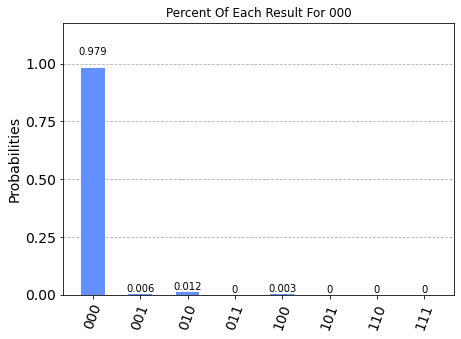

In [8]:
examplematrix=listofmatrixes[0]
examplematrix= examplematrix.transpose()

statelist = ['000','001','010','011','100','101','110','111']

zerozerozero = examplematrix[0]
zerozeroone = examplematrix[1]
zeroonezero = examplematrix[2]
zerooneone = examplematrix[3]
onezerozero = examplematrix[4]
onezeroone = examplematrix[5]
oneonezero = examplematrix[6]
oneoneone = examplematrix[7]

zerozerozerodic = dict(zip(statelist,zerozerozero))
zerozeroonedic = dict(zip(statelist, zerozeroone))
zeroonezerodic = dict(zip(statelist,zeroonezero))
zerooneonedic = dict(zip(statelist,zerooneone))
onezerozerodic = dict(zip(statelist,onezerozero))
onezeroonedic = dict(zip(statelist,onezeroone))
oneonezerodic = dict(zip(statelist,oneonezero))
oneoneonedic = dict(zip(statelist,oneoneone))

print(zerozerozerodic)

plot_histogram([zerozerozerodic], title="Percent Of Each Result For 000")

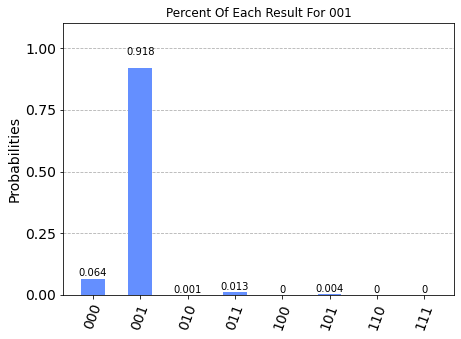

In [9]:
plot_histogram([zerozeroonedic], title="Percent Of Each Result For 001")

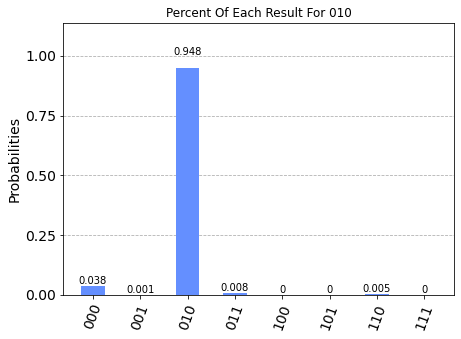

In [10]:
plot_histogram([zeroonezerodic], title="Percent Of Each Result For 010")

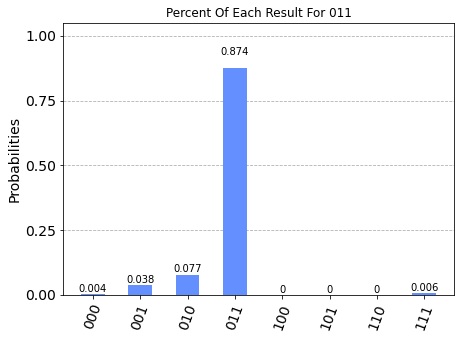

In [11]:
plot_histogram([zerooneonedic], title="Percent Of Each Result For 011")

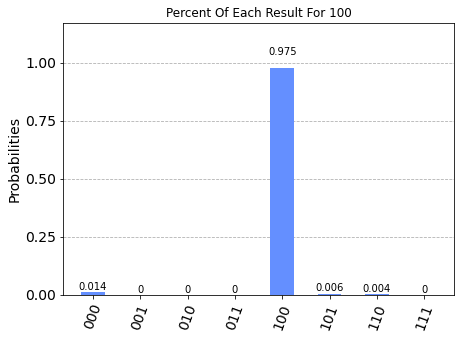

In [12]:
plot_histogram([onezerozerodic], title="Percent Of Each Result For 100")

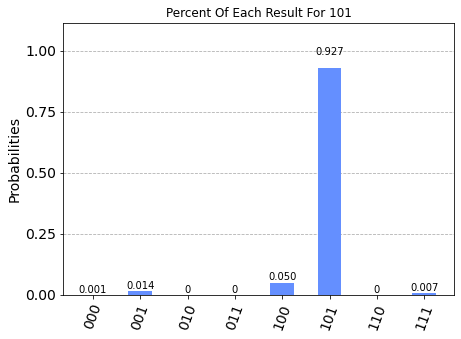

In [13]:
plot_histogram([onezeroonedic], title="Percent Of Each Result For 101")

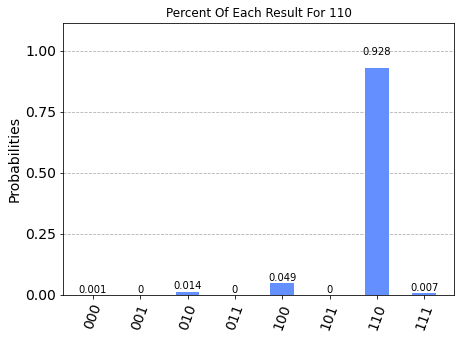

In [14]:
plot_histogram([oneonezerodic], title="Percent Of Each Result For 110")

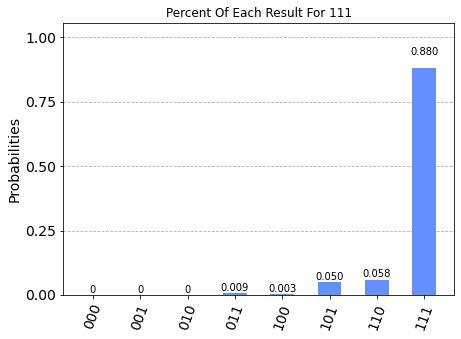

In [15]:
plot_histogram([oneoneonedic], title="Percent Of Each Result For 111")

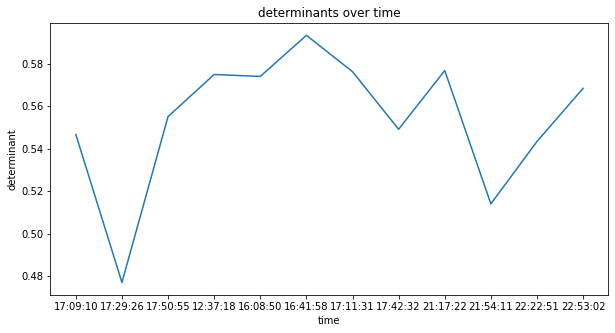

In [36]:
detlist = []
for array in listofmatrixes: 
    detlist.append(np.linalg.det(array))
    
timelist = []
for key, value in matrixdata.items():
    timeofday= key.split(' ')[1]
    smallertimeofday = timeofday.split('.')[0]
    timelist.append(smallertimeofday)
    
plt.plot(timelist,detlist)
plt.xlabel('time')
plt.ylabel('determinant')
plt.title('determinants over time')
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

{'17:09:10': 0.9786, '17:29:26': 0.9678, '17:50:55': 0.9814, '12:37:18': 0.9796, '16:08:50': 0.9508, '16:41:58': 0.951, '17:11:31': 0.9528, '17:42:32': 0.9502, '21:17:22': 0.9552, '21:54:11': 0.9534, '22:22:51': 0.9576, '22:53:02': 0.9474}


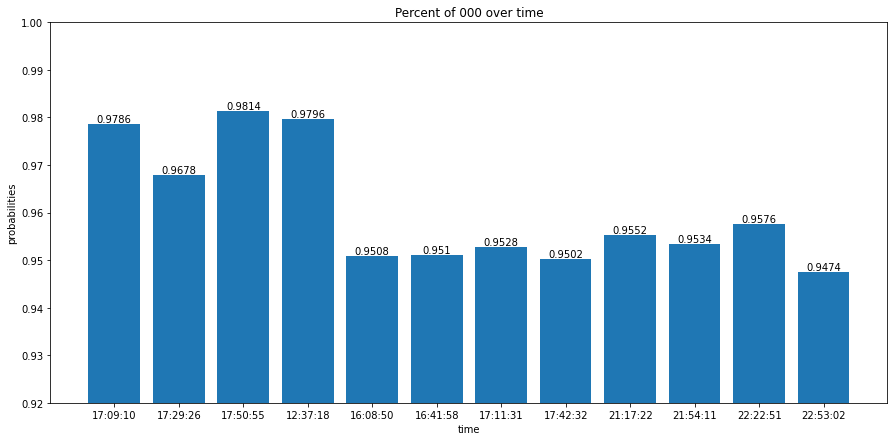

In [87]:
zerozerozerolist = []
zerozeroonelist = []
zeroonezerolist = []
zerooneonelist = []
onezerozerolist = []
onezeroonelist = []
oneonezerolist = []
oneoneonelist = []


for matrix in listofmatrixes: 
    matrix = matrix.transpose()
    zerozerozerolist.append(matrix[0][0])
    zerozeroonelist.append(matrix[1][1])
    zeroonezerolist.append(matrix[2][2])
    zerooneonelist.append(matrix[3][3])
    onezerozerolist.append(matrix[4][4])
    onezeroonelist.append(matrix[5][5])
    oneonezerolist.append(matrix[6][6])
    oneoneonelist.append(matrix[7][7])

#zerozerozerodict = dict(zip(timelist,zerozerozerolist))
#zerozeroonedict = dict(zip(timelist,zerozeroonelist))
#zeroonezerodict = dict(zip(timelist,zeroonezerolist))
#zerooneonedict = dict(zip(timelist,zerooneonelist))
#onezerozerodict = dict(zip(timelist,onezerozerolist))
#onezeroonedict = dict(zip(timelist,onezeroonelist))
#oneonezerodict = dict(zip(timelist,oneonezerolist))
#oneoneonedict = dict(zip(timelist,oneoneonelist))

plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 000 over time")
for i in range(len(zerozerozerolist)):
    plt.annotate(str(zerozerozerolist[i]), xy=(timelist[i],zerozerozerolist[i]), ha='center', va='bottom')
plt.bar(timelist,zerozerozerolist)
plt.ylim([0.92, 1])
plt.show()

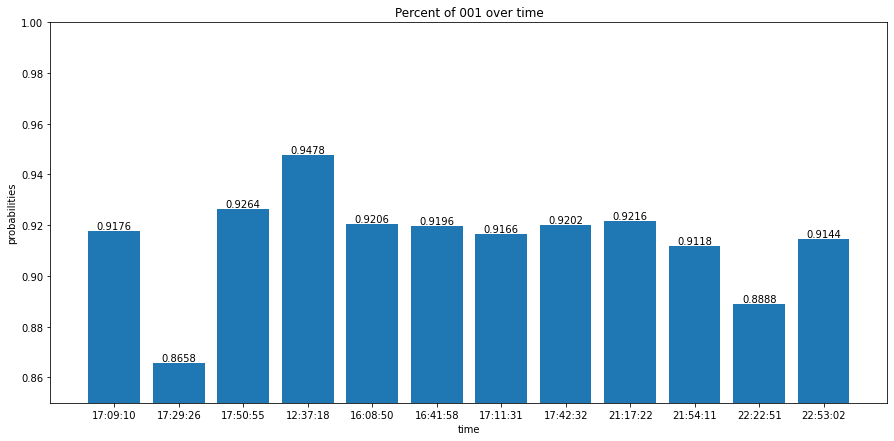

In [90]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 001 over time")
for i in range(len(zerozeroonelist)):
    plt.annotate(str(zerozeroonelist[i]), xy=(timelist[i],zerozeroonelist[i]), ha='center', va='bottom')
plt.bar(timelist,zerozeroonelist)
plt.ylim([0.85, 1])
plt.show()

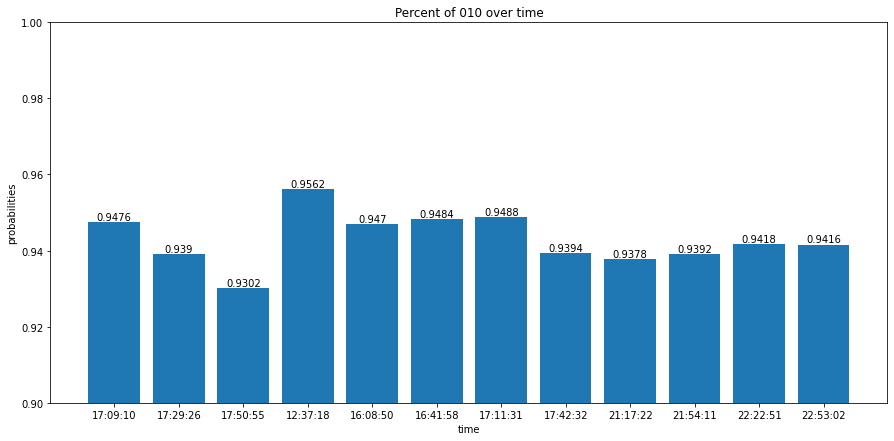

In [93]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 010 over time")
for i in range(len(zeroonezerolist)):
    plt.annotate(str(zeroonezerolist[i]), xy=(timelist[i],zeroonezerolist[i]), ha='center', va='bottom')
plt.bar(timelist,zeroonezerolist)
plt.ylim([0.9, 1])
plt.show()

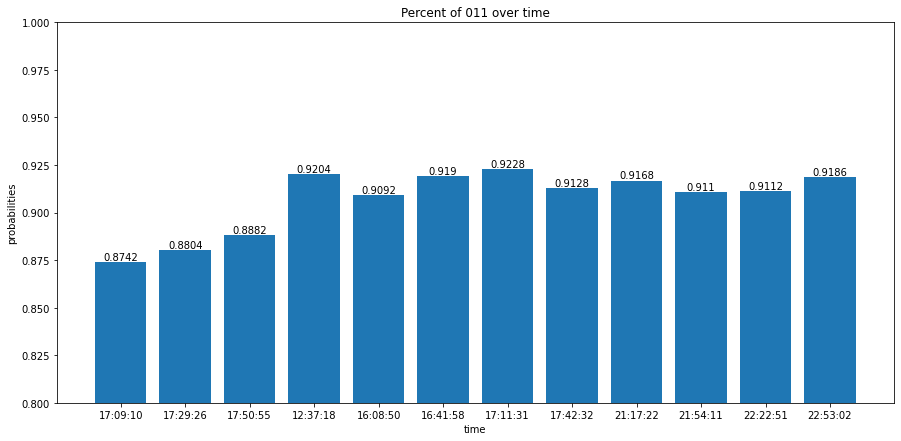

In [95]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 011 over time")
for i in range(len(zerooneonelist)):
    plt.annotate(str(zerooneonelist[i]), xy=(timelist[i],zerooneonelist[i]), ha='center', va='bottom')
plt.bar(timelist,zerooneonelist)
plt.ylim([0.80, 1])
plt.show()

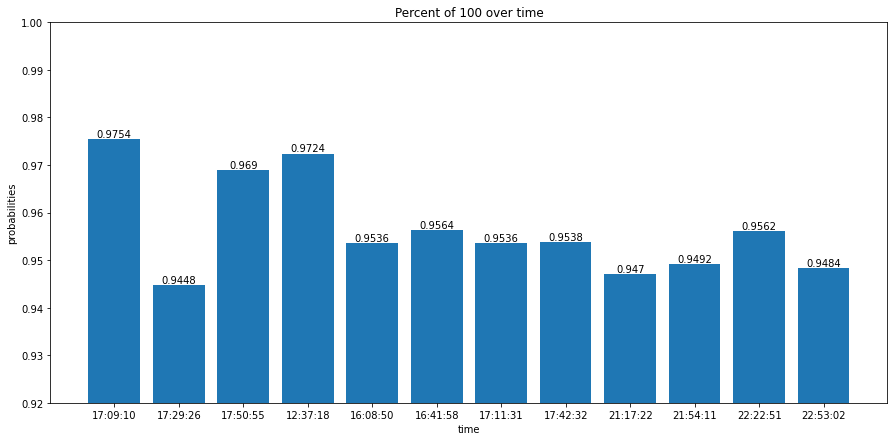

In [96]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 100 over time")
for i in range(len(onezerozerolist)):
    plt.annotate(str(onezerozerolist[i]), xy=(timelist[i],onezerozerolist[i]), ha='center', va='bottom')
plt.bar(timelist,onezerozerolist)
plt.ylim([0.92, 1])
plt.show()

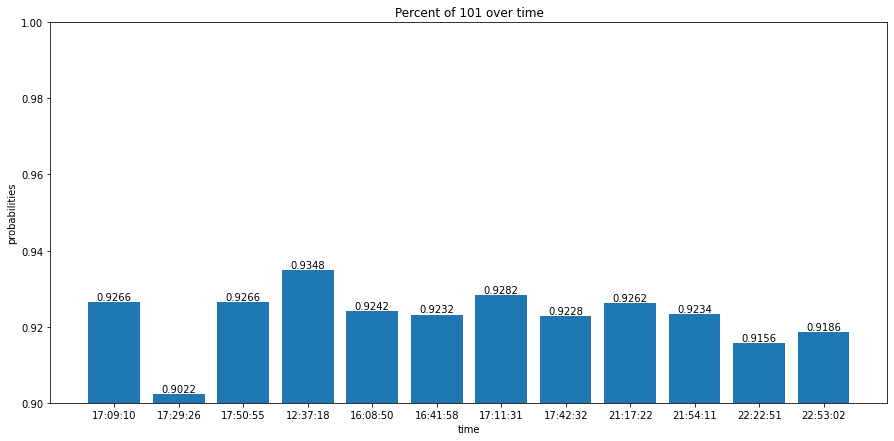

In [99]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 101 over time")
for i in range(len(onezeroonelist)):
    plt.annotate(str(onezeroonelist[i]), xy=(timelist[i],onezeroonelist[i]), ha='center', va='bottom')
plt.bar(timelist,onezeroonelist)
plt.ylim([0.9, 1])
plt.show()

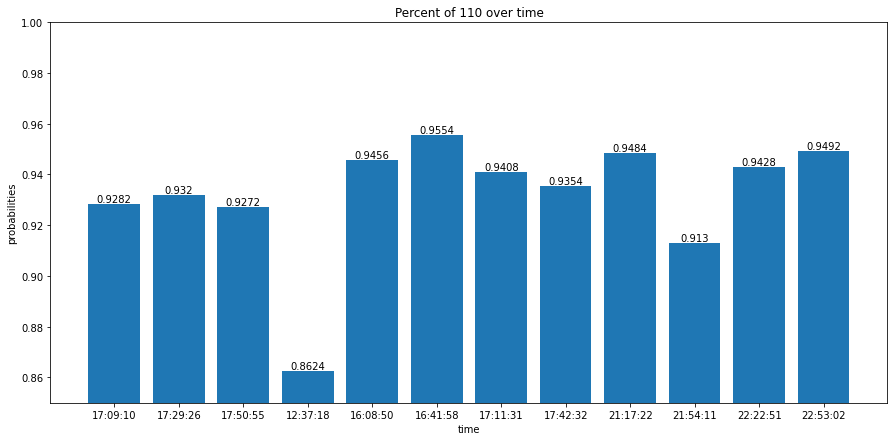

In [102]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 110 over time")
for i in range(len(oneonezerolist)):
    plt.annotate(str(oneonezerolist[i]), xy=(timelist[i],oneonezerolist[i]), ha='center', va='bottom')
plt.bar(timelist,oneonezerolist)
plt.ylim([0.85, 1])
plt.show()

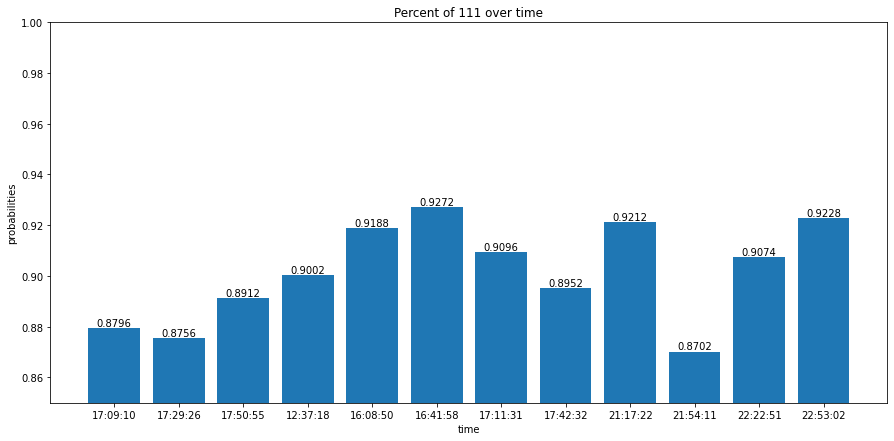

In [103]:
plt.xlabel('time')
plt.ylabel('probabilities')
plt.title("Percent of 111 over time")
for i in range(len(oneoneonelist)):
    plt.annotate(str(oneoneonelist[i]), xy=(timelist[i],oneoneonelist[i]), ha='center', va='bottom')
plt.bar(timelist,oneoneonelist)
plt.ylim([0.85, 1])
plt.show()